In [5]:
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#Lendo o csv e atribuindo a uma variavel
dfcar = pd.read_csv("./data/ElectricCarData_Clean.csv")
pd.set_option('display.max_rows', dfcar.shape[0]+1)
dfcar.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [7]:
# Vendo a quantidade de linhas e colunas do banco de dados
dfcar.shape

(103, 14)

In [8]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [9]:
# Verificando a existencia de valores nulos
dfcar.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [10]:
# Mostrando as duas primeiras linhas
dfcar.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


In [11]:
# Pegando aleatoriamente 10 linhas em qualquer posição
dfcar.sample(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
60,Renault,Zoe ZE40 R110,11.4,135,255,161,230,Yes,FWD,Type 2 CCS,Hatchback,B,5,29234
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480


RENOMEANDO AS COLUNAS

In [12]:
# -------------------------------------------------
#  REMOMEANDO AS COLUNAS E PEGANDO A PRIMEIRA LINHA COM O NOME DAS MESMAS
# -------------------------------------------------
dfcar = dfcar.rename(columns =
{
    'Brand': 'Marca', 'Model': 'Modelo','AccelSec': 'Acel/s','TopSpeed_KmH':'Veloc_Max_Kmh',
    'Range_Km':'Autonomia_km','FastCharge_KmH':'Km/Hr_Carga','PowerTrain':'Tracao',
    'PlugType': 'Tipo_Conector','BodyStyle': 'Estilo', 'Segment':'Segmento','Assentos': 'Assentos', 
    'PriceEuro': 'Preco(€)','Efficiency_WhKm':'Eficiencia_WhKm'
}) 
# duas maneiras de ver o nome das colunas
dfcar.head(0)
#dfcar.columns
# -------------------------------------------------

,Marca,Modelo,Acel/s,Veloc_Max_Kmh,Autonomia_km,Eficiencia_WhKm,Km/Hr_Carga,RapidCharge,Tracao,Tipo_Conector,Estilo,Segmento,Seats,Preco(€)


In [96]:
# -------------------------------------------------
#  OBTENDO UMA DESCRIÇÃO DOS DADOS(poderia ser feito de forma direta, sem armazenar o result em uma variável)
# -------------------------------------------------
desc_dados = dfcar.describe()
desc_dados
# -------------------------------------------------

,Acel/s,Veloc_Max_Kmh,Autonomia_km,Eficiencia_WhKm,Seats,Preco(€)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


MARCAS E QUANTIDADE DE LANÇAMENTOS

Text(0.5, 0, 'Quantidade de Lançamentos')

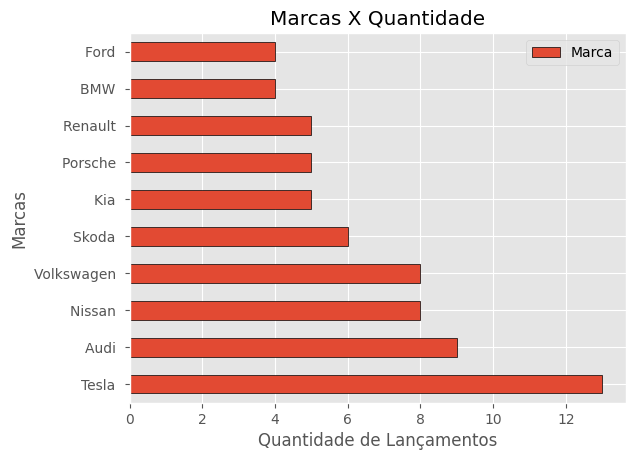

In [61]:
# -------------------------------------------------
#  MARCAS E QUANTIDADE DE LANÇAMENTOS
# -------------------------------------------------

df_marca_modelo = dfcar.groupby('Marca')['Marca'].count().sort_values(ascending=False).head(10)
df_marca_modelo.plot.barh(title= "Marcas X Quantidade", grid=True, legend=True, style=sorted, edgecolor="black")
plt.ylabel("Marcas")
plt.xlabel("Quantidade de Lançamentos")
# -------------------------------------------------

DETALHANDO A AUTONOMIA

In [75]:
#-------------------------------------------------
# RELACIONANDO OS MODELOS DE MAIOR AUTONOMIA
#-------------------------------------------------
df_max_auton = dfcar[["Autonomia_km", "Marca", "Modelo"]]
df_max_auton.sort_values(by="Autonomia_km", ascending=False).head().reset_index()
#-------------------------------------------------

,index,Autonomia_km,Marca,Modelo
0,51,970,Tesla,Roadster
1,33,750,Tesla,Cybertruck Tri Motor
2,5,610,Lucid,Air
3,48,575,Lightyear,One
4,40,515,Tesla,Model S Long Range


Text(0.5, 0, 'Marca')

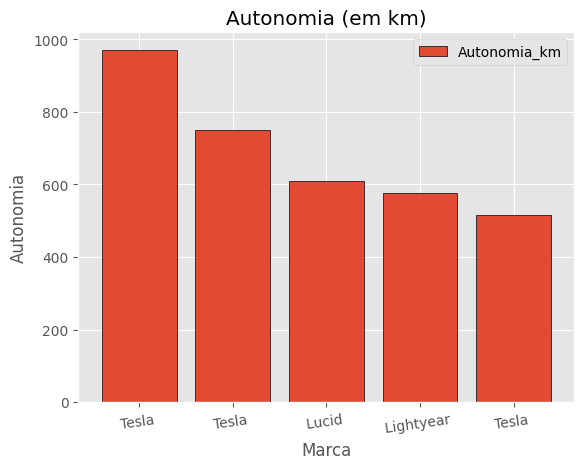

In [155]:
#-------------------------------------------------
# RELACIONANDO OS MODELOS DE MAIOR AUTONOMIA USANDO O NLARGEST
# PARA RELACIONAR OS MODELOS DE MENOR AUTONOMIA BASTA USAR O 
#-------------------------------------------------
df_max_auton = dfcar[["Autonomia_km", "Marca"]]
a = df_max_auton.nlargest(5, "Autonomia_km")
a.plot.bar(title='Autonomia (em km)', x="Marca", legend=True, style=sorted, edgecolor="black", rot=8, grid=True, width=0.8)
plt.ylabel("Autonomia")
plt.xlabel("Marca")
#-------------------------------------------------

MOSTRANDO A AUTONOMIA EM GRÁFICO

<AxesSubplot: title={'center': 'Modelos com Autonomia Acima de 400 km'}, xlabel='Marca'>

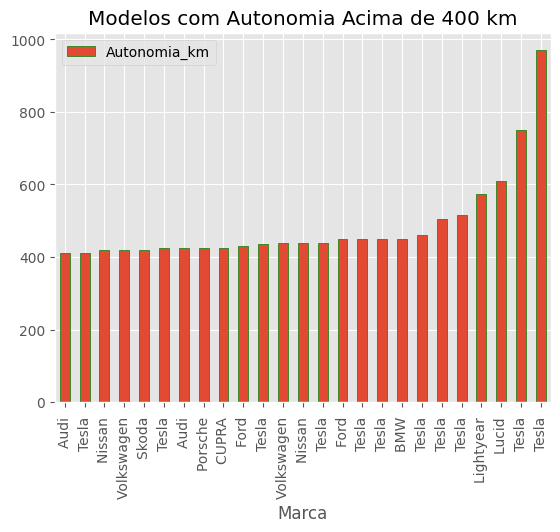

In [178]:
#-------------------------------------------------
# PEGANDO MODELOS COM AUTONOMIA ACIMA DE 400 KM
#-------------------------------------------------
df_max_auton = dfcar.loc[dfcar["Autonomia_km"] > 400, ["Marca", "Autonomia_km"]]
vauton = df_max_auton.sort_values(by="Autonomia_km")
vauton.plot.bar(
    title='Modelos com Autonomia Acima de 400 km', 
    x="Marca", 
    legend=True, 
    style=sorted, 
    edgecolor="green", 
    grid=True
)
#-------------------------------------------------

In [17]:
#-------------------------------------------------
# LOCALIZANDO O FABRICANTE DO MODELO DE MAIOR AUTONOMIA
#-------------------------------------------------
# Pegando a primeira marca da lista.
# Obaservar que não é necessariamente o que tem a maior autonomia
dfcar.iloc[0, 0]
#-------------------------------------------------

'Tesla '

<AxesSubplot: title={'center': 'Tipo de Tração'}, ylabel='Tracao'>

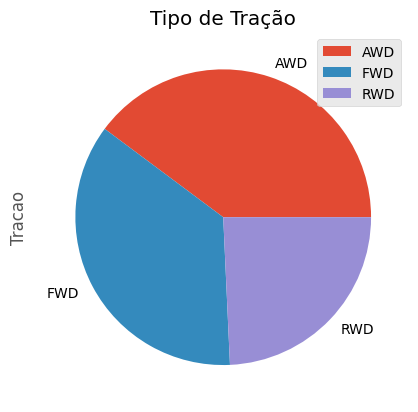

In [18]:
#-------------------------------------------------
# PERCENTUAL GRÁFICO DOS TIPOS DE TRAÇÃO
#-------------------------------------------------
df_tracao = dfcar.groupby("Tracao")["Tracao"].count()
trac = df_tracao
trac.plot.pie(title="Tipo de Tração", legend=True, style=sorted)
#-------------------------------------------------

05 MODELOS DE MAIOR VELOCIDADE (em Kmh).

<AxesSubplot: title={'center': 'Velocidade Máxima'}, xlabel='Marca'>

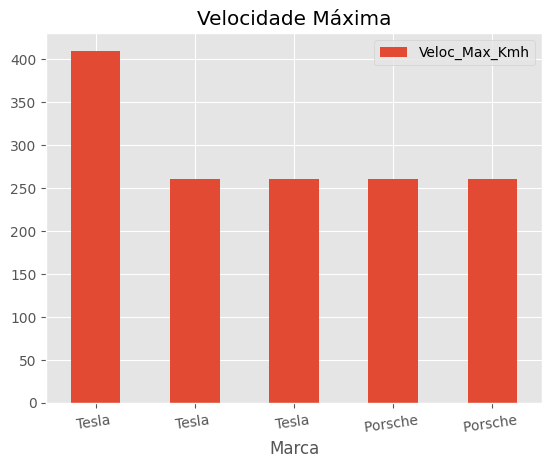

In [156]:
# #-------------------------------------------------
# OBTENDO A LISTA DOS MODELOS MAIS VELOZES
# #-------------------------------------------------
df_veloc_max = dfcar.loc[dfcar['Veloc_Max_Kmh'] > 0, ['Marca', 'Modelo', 'Veloc_Max_Kmh']]
# #-------------------------------------------------
# Ordenando os valores e mostrando os cinco primeiros resultados
vmax = df_veloc_max.sort_values(by="Veloc_Max_Kmh", ascending=False).head()
vmax.plot.bar(title = 'Velocidade Máxima', x='Marca', rot=8, legend=True, style=dict)
#-------------------------------------------------

MODELOS COM DOIS ASSENTOS

In [161]:
#---------------------------------------------------
# OBTENDO LISTA DE MODELOS COM DOIS ASSENTOS
#---------------------------------------------------
# Agruopando por quantidade de assentos
df_dois_assentos = dfcar.loc[dfcar['Seats'] == 2, ["Marca", "Modelo",  "Seats", "Preco(€)"]]
df_dois_assentos[["Marca", "Preco(€)"]]
#---------------------------------------------------

,Marca,Preco(€)
82,Smart,21387
91,Smart,24565


MODELO COM QUATRO ASSENTOS

<AxesSubplot: title={'center': 'Grafico da Quantidade de Assentos'}, ylabel='Seats'>

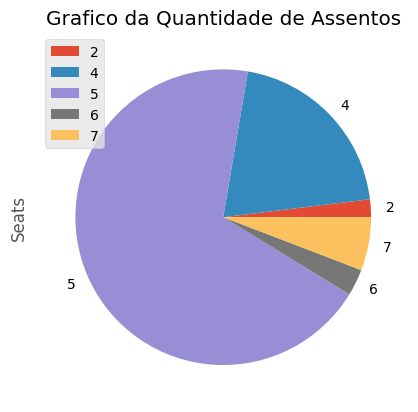

In [158]:
#-------------------------------------------------
# OBTENDO PERCENTUAL GRÁFICO DA QUANTIDADE DE ASSENTOS
#-------------------------------------------------
df_qtd_assentos_por_modelo = dfcar.loc[dfcar['Seats'] >= 0, ['Marca', 'Seats', "Modelo"]]
qt = df_qtd_assentos_por_modelo.groupby('Seats')['Seats'].count()
qt.plot.pie(title = 'Grafico da Quantidade de Assentos', rot=8, legend=True)
#-------------------------------------------------


# MODELO COM CINCO ASSENTOS OU MAIS

In [142]:
#-------------------------------------------------
# OBTENDO PRIMEIROS MODELOS COM CINCO ASSENTOS
#-------------------------------------------------
df_qtd_assentos_por_modelo = dfcar.loc[dfcar['Seats'] == 5, ["Seats", "Marca", "Modelo"]]
df_qtd_assentos_por_modelo.head()
#-------------------------------------------------

,Seats,Marca,Modelo
0,5,Tesla,Model 3 Long Range Dual Motor
1,5,Volkswagen,ID.3 Pure
2,5,Polestar,2
3,5,BMW,iX3
5,5,Lucid,Air


In [ ]:
#-------------------------------------------------
# OBTENDO PRIMEIROS MODELOS COM CINCO ASSENTOS
#-------------------------------------------------
df_qtd_assentos_por_modelo = dfcar.loc[dfcar['Seats'] == 5, ["Seats", "Marca", "Modelo"]]
df_qtd_assentos_por_modelo.head()
#-------------------------------------------------

In [148]:
#-------------------------------------------------
# OBTENDO QUANTIDADE DE ASSENTOS E QUANTIDADE DE MODELOS 
#-------------------------------------------------
df_agrupando_assentos = dfcar.loc[dfcar['Seats'] >= 0, ["Seats", "Marca"]]
df_agrupando_assentos.groupby(by='Seats').count()


,Marca
Seats,
2,2
4,21
5,71
6,3
7,6


# MODELO COM SEIS E SETE ASSENTOS 

In [25]:
# --------------------------------------------------
# OBTENDO AS MARCAS E MODELOS COM SEIS OU MAIS ASSENTOS
# --------------------------------------------------
df_qtd_assentos_por_modelo = dfcar.loc[dfcar["Seats"] >= 6, ["Seats", "Marca", "Modelo"]]
df_qtd_assentos_por_modelo.sort_values(by="Seats").reset_index()
# --------------------------------------------------

,index,Seats,Marca,Modelo
0,33,6,Tesla,Cybertruck Tri Motor
1,67,6,Tesla,Cybertruck Dual Motor
2,86,6,Tesla,Cybertruck Single Motor
3,21,7,Tesla,Model Y Long Range Dual Motor
4,54,7,Tesla,Model X Long Range
5,61,7,Tesla,Model Y Long Range Performance
6,66,7,Nissan,e-NV200 Evalia
7,81,7,Tesla,Model X Performance
8,84,7,Mercedes,EQV 300 Long


In [26]:
# JUNTANDO AUTONOMIA E VELOCIDADE EM UMA UNICA AMOSTRA DE DADOS
#import matplotlib as plot
import matplotlib.pyplot as plot
plot.style.use('ggplot')

AGRUPANDO POR ESTILO

In [27]:
# --------------------------------------------------
# RELACIONANDO OS ESTILOS
# --------------------------------------------------
estilos = dfcar['Estilo']
df_est = pd.DataFrame([estilos.unique()])
display(df_est.T)
# --------------------------------------------------

,0
0,Sedan
1,Hatchback
2,Liftback
3,SUV
4,Pickup
5,MPV
6,Cabrio
7,SPV
8,Station


AGRUPANDO POR MARCA E ESTILO

In [150]:
# --------------------------------------------------
# RELACIONANDO OS ESTILOS COM OS MODELOS (PEGANDO APENAS UMA AMOSTRA)
# --------------------------------------------------
sedan = dfcar.loc[dfcar["Estilo"] == "Sedan", ["Marca", "Estilo", "Modelo"]]
suv = dfcar.loc[dfcar["Estilo"] == "SUV", ["Marca", "Estilo", "Modelo"]]
Hatch = dfcar.loc[dfcar["Estilo"] == "Hatchback", ["Marca", "Estilo", "Modelo"]]
df = pd.concat([sedan, suv, Hatch])
df.sample(5)
# --------------------------------------------------

,Marca,Estilo,Modelo
101,Nissan,Hatchback,Ariya e-4ORCE 87kWh Performance
37,CUPRA,Hatchback,el-Born
1,Volkswagen,Hatchback,ID.3 Pure
24,Tesla,Sedan,Model 3 Long Range Performance
41,Hyundai,SUV,Kona Electric 39 kWh


In [107]:
# --------------------------------------------------
# OBTENDO DOIS MODELOS DE UMA MARCA ESPECIFICA 
# E RELACIONANDO MARCA, ESTILO, MODELO E PREÇO
# --------------------------------------------------
marca_espec = dfcar.loc[[51, 8], ["Marca", "Estilo", "Modelo", "Preco(€)"]]
marca_espec
# --------------------------------------------------

,Marca,Estilo,Modelo,Preco(€)
51,Tesla,Cabrio,Roadster,215000
8,Tesla,Sedan,Model 3 Standard Range Plus,46380


In [176]:
# --------------------------------------------------
# OBTENDO O QUANTITATIVO DE LANÇAMENTOS - OUTRA FORMA, SEM GRÁFICO
# --------------------------------------------------
qtd_lancamentos = dfcar.groupby("Marca")['Marca'].count()
df = pd.Series(qtd_lancamentos, name="Lançamentos (Qtd)")
#df.nlargest(4, 'Veloc_Max_Kmh')
df.to_frame()
# --------------------------------------------------

,Lançamentos (Qtd)
Marca,
Aiways,1
Audi,9
BMW,4
Byton,3
CUPRA,1
Citroen,1
DS,1
Fiat,2
Ford,4


In [175]:
# --------------------------------------------------
# OTENDO MARCAS E RESPECTIVOS MODELOS LANÇADOS PELA MESMA
# --------------------------------------------------
qt = dfcar.groupby("Marca")['Modelo'].sum()
qt.to_frame()
# --------------------------------------------------

,Modelo
Marca,
Aiways,U5
Audi,Q4 e-tron e-tron GT e-tron 50 quattroe-tron Sp...
BMW,iX3 i4 i3 120 Ahi3s 120 Ah
Byton,M-Byte 95 kWh 4WDM-Byte 72 kWh 2WDM-Byte 95 kW...
CUPRA,el-Born
Citroen,e-C4
DS,3 Crossback E-Tense
Fiat,500e Hatchback500e Convertible
Ford,Mustang Mach-E ER RWDMustang Mach-E ER AWDMust...
